# Capstone Regression Project
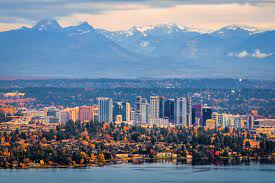

Real estate investment firms purchased 9.6% of residential homes in King County in 2021. Our stakeholders are the Real Estate Investors Association of Washington(REIWA). The purpose of this project is to providethe REIWA withvaluable insight regarding which factors contribute most to the fluctuations of housing sale prices in King County. 


## Business Understanding
The Real Estate Investors Association of Washington would like to find ways to attract more homeowners to King County, Washington. Using data from 2021 to 2022 home sales in King County, Washington, we would like to determine the key features that predict home sales and make appropriate reccomendations. 

## Data Understanding
Data regarding home sales in King County, Washington was given in one file. Our primary dataset contains around 30,000 rows, each representing the sale price of a house in the year 2021 and 2022. These two years are of importance due to the very low interest rates of mortgage loans, allowing price fluctuations to further reflect the variables in the dataset. For the final model, the target column will be a log transformed version of Home Sales in King County, Washington. 

## Data Preparation

### Loading the Data

In [480]:
# Import necesscarry libriaries and check head of datast  
import numpy as np
import pandas as pd
!pip install requests 
import requests 
import datetime
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/kc_house_data.csv', index_col = 0 )

### Data Exploration

In [481]:
# Check the head of data 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [482]:
#Check the tail of data 
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,...,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634


In [483]:
#Check random middle 
df[60:80]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
6071200660,4/19/2022,1500000.0,3,1.5,1430,8735,1.0,NO,NO,NO,...,PUBLIC,1430,0,500,200,1958,0,"5214 116th Place Southeast, Bellevue, Washingt...",47.556225,-122.183170
6365900045,5/31/2022,740000.0,3,1.0,1330,5750,1.0,NO,NO,NO,...,PUBLIC,1330,0,0,150,1949,0,"4021 51st Avenue Southwest, Seattle, Washingto...",47.567825,-122.397830
1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,NO,...,PUBLIC,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760
8682321450,7/29/2021,1500000.0,2,2.5,2170,9714,1.0,NO,YES,NO,...,PUBLIC,2170,0,580,460,2009,0,"12643 237th Way Northeast, Redmond, Washington...",47.712125,-122.023085
4385701220,6/18/2021,1835000.0,3,3.5,1880,2510,2.0,NO,NO,NO,...,PUBLIC,1620,700,440,220,1992,0,"2345 43rd Avenue East, Seattle, Washington 981...",47.640365,-122.277315
2540830020,9/16/2021,905000.0,3,2.5,1630,6449,1.0,NO,NO,NO,...,PUBLIC,1310,640,510,80,1986,0,"14037 82nd Place Northeast, Kirkland, Washingt...",47.727545,-122.231665
3424069224,6/20/2021,1007500.0,4,2.0,1890,36087,1.0,NO,NO,YES,...,PRIVATE,1890,0,440,320,1961,0,"1040 2nd Avenue Southeast, Issaquah, Washingto...",47.518600,-122.029015
3449500145,10/21/2021,275000.0,4,1.0,1700,7692,1.0,NO,NO,NO,...,PUBLIC,1200,1150,450,120,1958,0,"1701 Monroe Avenue Northeast, Renton, Washingt...",47.506905,-122.175105
869700560,5/24/2022,590000.0,2,2.5,1220,1928,2.0,NO,NO,NO,...,PUBLIC,1220,0,440,0,1999,0,"555 Elma Place Northeast, Renton, Washington 9...",47.491350,-122.154400


In [484]:
#Check the column titles 
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long'],
      dtype='object')

In [485]:
#Check column information, columns 13 abd 14 have nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [486]:
#Inspect distributions of numerical features 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [487]:
#Inspect value counts of categorical features 
categoricals = df.select_dtypes("object")

for col in categoricals:
    print(df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
1/16/2022       1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 365, dtype: int64 

NO     29636
YES      519
Name: waterfront, dtype: int64 

NO     29382
YES      773
Name: greenbelt, dtype: int64 

NO     24893
YES     5262
Name: nuisance, dtype: int64 

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64 

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64 

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64 

Gas         

### Data Cleaning

In [488]:
#Renamme column date to selldate for specifity and  change to datetime object
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate,inplace=True)
df['selldate'] = pd.to_datetime(df['selldate'])
df['sellyear'] = df['selldate'].dt.year.astype(int)

In [489]:
#assess changes
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sellyear
id,,,,,,,,,,,,,,,,,,,,,
7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022
8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021
1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021
1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021
8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021


In [490]:
# Create a zipcode column
df['zipcode'] = df.address.apply(lambda x: x[-20:-15]).astype(int)

In [491]:
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sellyear,zipcode
id,,,,,,,,,,,,,,,,,,,,,
7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,98055
8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,98133
1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,98178
1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,98118
8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,98027


In [492]:
#Create age of house column
df['yr_old'] = np.where(df['yr_renovated'] != 0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                          df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [493]:
# drop missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
sellyear         0.000000
zipcode          0.000000
yr_old           0.000000
dtype: float64

In [494]:
#Save to drop because percentage is so small 
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [495]:
#assess column
df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sellyear,zipcode,yr_old
id,,,,,,,,,,,,,,,,,,,,,
7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,2022,98055,53
8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,2021,98133,71
1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,2021,98178,65
1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,2021,98118,11
8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,2021,98027,9


In [496]:
#check correlations 
df.corr()['price']

price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
sellyear         0.073904
zipcode          0.020959
yr_old          -0.126909
Name: price, dtype: float64

# Analysis of Correlations 
Very low correlations could possibly indicate a nonlinear relationship or the need for an interaction term.

## Modeling

### Baseline Model

<AxesSubplot:>

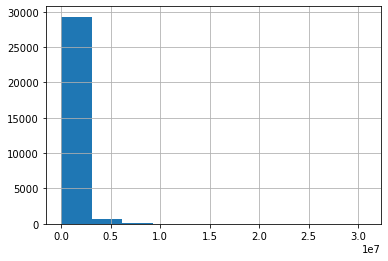

In [497]:
#Create DV for first model, DV is not normally distributed
target = df['price']
target.hist()

In [498]:
#Create IVs for 1st model 
pred_cols1 = [x for x in df.columns if x not in ['waterfront','greenbelt','nuisance','view','condition','grade', 'heat_source', 'sewer_system', 'address', 'zipcode', 'sellyear', 'city']]
pred_cols1
pred_cols = df[pred_cols1]


In [499]:
#Create variable for scatter plot matrix of chosen Numerical features
df2 = [x for x in df.columns if x not in ['selldate','long', 'lat','yr_built', 'waterfront','greenbelt','nuisance','view','condition','grade', 'heat_source', 'sewer_system', 'address', 'sellyear', 'zipcode', 'yr_renovated', 'yr_built', 'floors']]
df22 = df[df2]
df22.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_old
id,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1180,0,0,40,53
8910500230,920000.0,5,2.5,2770,6703,1570,1570,0,240,71
1180000275,311000.0,6,2.0,2880,6156,1580,1580,0,0,65
1604601802,775000.0,3,3.0,2160,1400,1090,1070,200,270,11
8562780790,592500.0,2,2.0,1120,758,1120,550,550,30,9


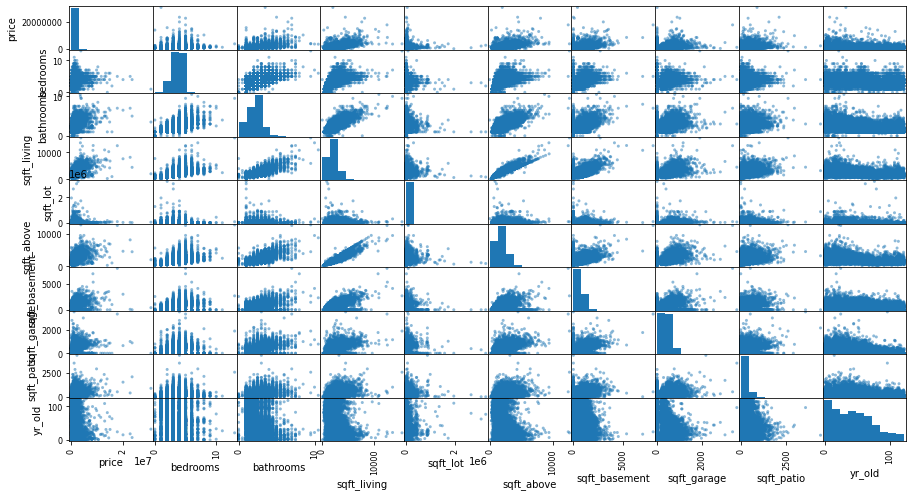

In [500]:
#Scatterplot analysis
pd.plotting.scatter_matrix(df22, figsize=(15,8));

# Scatterplot Interpretation
Although not strong, there appears to be some weak correlations between sqft_above and price, sqft_living and price, bathrooms and price and the rest of the square foot variables. The distribution for our dependent variable price is rightly skewed. There is some correlation between independent variables as well that could cause multicollinearity. Suprisingly, there is no clear relationship between sales and the age of the house

In [501]:
#Run first model and do interpretation 
y= df22['price']
X= df22.drop('price', axis=1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [502]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2317.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:00:34   Log-Likelihood:            -4.4751e+05
No. Observations:               30111   AIC:                         8.950e+05
Df Residuals:                   30101   BIC:                         8.951e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.853e+04   1.92e+04     -3.576      0.000   -1.06e+05    -3.1e+04
bedrooms      -1.684e+05   5468.387    -30.788      0.000   -1.79e+05   -1.58e+05
bathrooms      1.369e+05   7957.391     17.201      0.000    1.21e+05    1.52e+05
sqft_living     333.1075     18.105     18.399      0.000     297.622     368.593
sqft_lot         -0.0844      0.068     -1.244      0.213      -0.217       0.049
sqft_above      293.8633     17.981     16.343      0.000     258.620     329.107
sqft_basement   179.1851     13.698     13.081      0.000     152.337     206.033
sqft_garage    -203.9199     17.554    -11.617      0.000    -238.327    -169.513
sqft_patio      275.8936     17.987     15.339      0.000     240.639     311.148
yr_old         2760.9043    163.621     16.874      0.000    2440.200    3081.608
==============================================================================
Omnibus:                    42962.389   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46845355.164
Skew:                           8.026   Prob(JB):                         0.00
Kurtosis:                     195.563   Cond. No.                     3.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Diagnostics

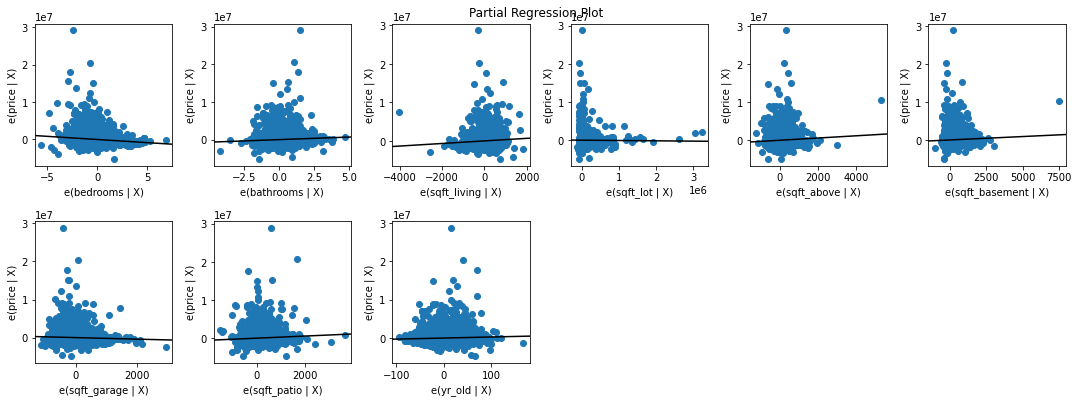

In [503]:
#Partial Regression Plot for Baseline Model
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(3,6),
    fig=fig)
plt.show()

In [504]:
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(target, y_pred)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


381431.61178209767

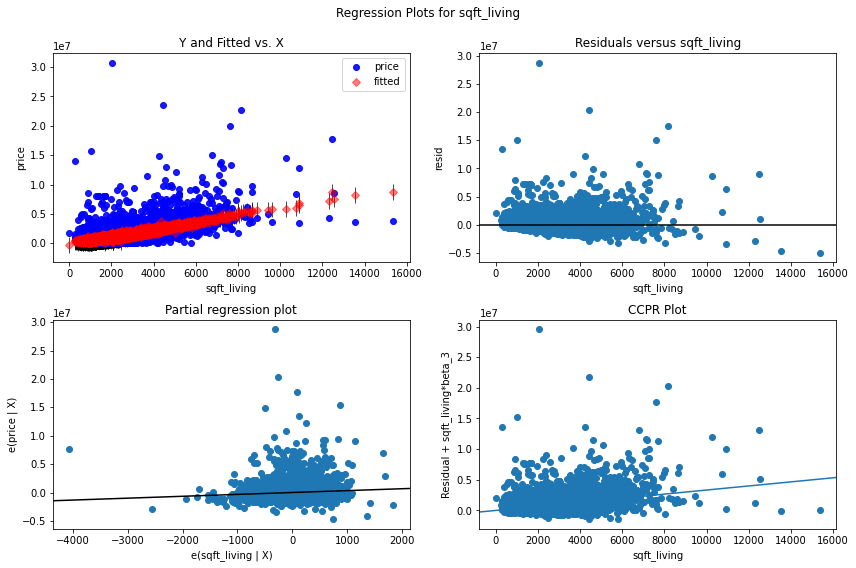

In [505]:
#Analyze Regression Plots for Sqft_living, model doesnt encompass alot of data, alot of outliers
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'sqft_living', fig=fig)

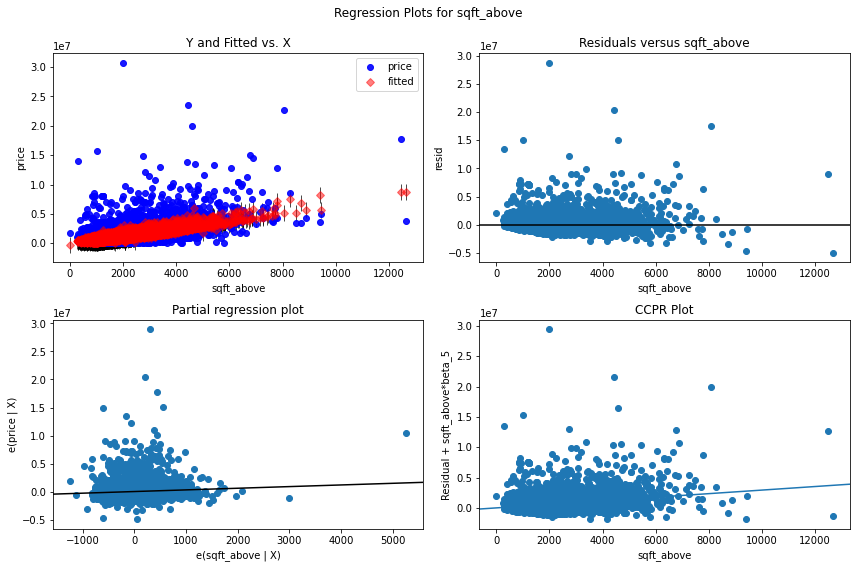

In [506]:
#Analyze Regression Plots for sqft_above, outliers 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'sqft_above', fig=fig)

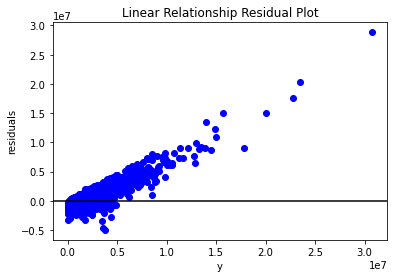

In [507]:
#Residual Plot Analysis
fig, ax = plt.subplots()

ax.scatter(y, results.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

## Interpretation of Baseline Model 

This model explains approximately 41% of the variation in home sales
Overall the model is statistically significant with an F-statistic well below 0.05
Our goal for model specification is to find statistically significant, highly influetial variables that contribute to the fluctuations of home sales 
The residual plot indicates that there is a problem with our model, one factor being the prevalence of outliers in our data



The partial regression plot for these numeric variables lean more toward a cluster of data as opposed to a linear relationship,however, it is important to note that the graphs look different than the scatterplots.  The partial regression plot for sqft_above looks the weakest. The squarefoot variables could possibly be linealy related. The model is off on average by about $380.000.00, this indicates the need for a better model. The residual plot shows a curvature among the independent variable sqft_lot. The choice of these particular features come from prior research and the linear scatterplots. 

Interpretation

When all IV(s) are at 0, a house will be worth -$68531.82, on average 

For a one unit increase in bedrooms, this model says the a house will decrease by $168362.41, on average. This interpretation is a classic example of the effects of omitting significant variables. Some researchers believe that bedrooms have a diminishing return

For a one unit increase in bathrooms, this model says the a house will increase by $136878.72, on average.

For a one unit increase in square feet of the living area, this model says the a house will increase by $333.11, on average.

For a one unit increase in the square footage of the lot of the home, this model says the a house will decline by $.08, on average.The errors are very obvious here as we know through theory that square footage of the lot should increase the value of the home. 

For a one unit increase in sqare feet above, this model says the a house will increase by $293.86, on average.

For a one unit increase in square feet of the basement, this model says the a house will increase by $179.72, on average.

For a one unit increase in square feet of the garage, this model says the a house will decrease by $203.86, on average.

For a one unit increase in square feet of the patio, this model says the a house will increase by $275.86, on average. 

For a one unit increase in the age of a home, this model says the a house will increase by $2760.90, on average. This makes since due to the fact that houses appreciate in value. 

In [508]:
results_df = pd.concat([results.params, results.pvalues], axis=1)
results_df.columns = ["coefficient", "pvalues"]
results_df

,coefficient,pvalues
const,-68531.819978,3.488273e-04
bedrooms,-168362.401528,5.704311e-205
bathrooms,136878.722883,5.358540e-66
sqft_living,333.107516,3.458365e-75
sqft_lot,-0.084448,2.133975e-01
sqft_above,293.863272,8.825207e-60
sqft_basement,179.185127,5.376341e-39
sqft_garage,-203.919890,3.958293e-31
sqft_patio,275.893596,6.682887e-53
yr_old,2760.904311,1.376069e-63


## Model Iteration

In [509]:
#Model iteration to include categorical columns 
cat_columns = ['grade', 'heat_source']
dummy_df = pd.get_dummies(data=df, columns=cat_columns, drop_first=True)
dummy_df.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other
id,,,,,,,,,,,,,,,,,,,,,
7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,1,0,0,0,1,0,0,0,0
8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,1,0,0,0,0,0,1,0,0
1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,1,0,0,0,1,0,0,0,0
1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,0,0,0,1,0,1,0,0,0,0
8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,0,1,0,0,0,0,0,0,0,0


In [510]:
#dummy_df.info()

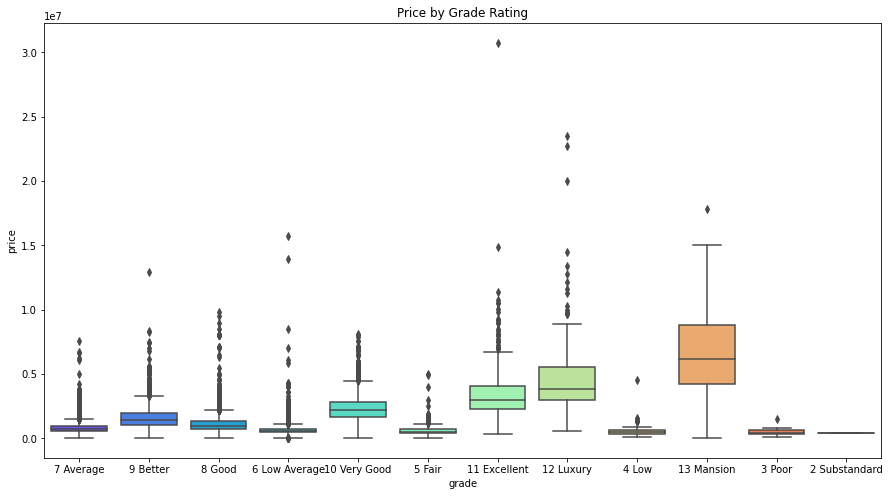

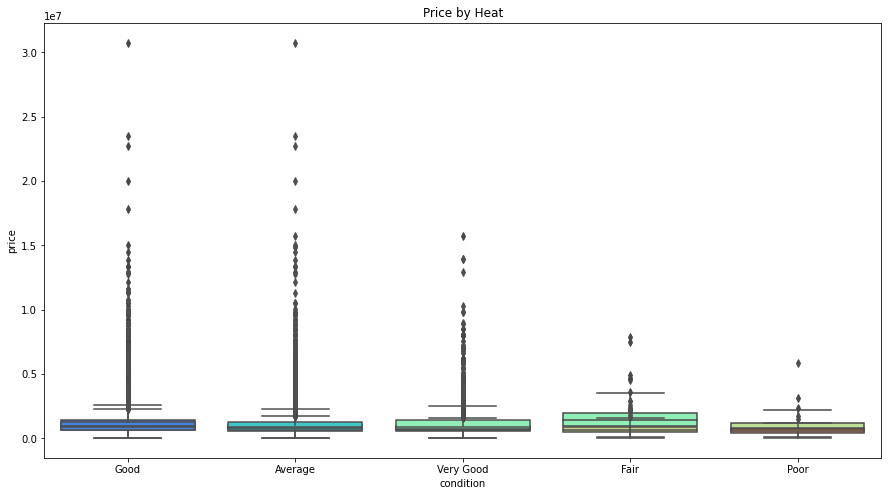

In [511]:
plt.figure(figsize=(15,8))
sns.boxplot(x='grade',y='price',data=df, palette='rainbow')
plt.title("Price by Grade Rating");
plt.figure(figsize=(15,8))
sns.boxplot(x='heat_source',y='price',data=df, palette='rainbow')
plt.title("Price by Waterfront");
sns.boxplot(x='condition',y='price',data=df, palette='rainbow')
plt.title("Price by Heat");

# Interpretation of Boxplots 
The top visualization is the distribution of price by how a house has been graded. The reference category is the level 'Very Poor'. The boxplots represents a visulation of each level relative to the reference category. We see here that grade Excellent , Luxury and Mansion have the greates variablity in terms of the saleprice of a home. In fact, the range at the lower end of the tail appear to all have the same median, up until rank '9 Better'. Mansion has the highest median and Luxury has the most variabilty. Outliers are apart of most categorical levels. 

The bottom visualization is the distribution of price by 

In [512]:
dummy_df.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long',
       'sellyear', 'zipcode', 'yr_old', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other'],
      dtype='object')

In [513]:
#Createdummies and run 2nd model 
x1 = dummy_df.drop(labels=['selldate', 'price', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'sewer_system', 'address'], axis=1)
y1=dummy_df['price'] 

dummy1 = sm.OLS(y1, sm.add_constant(x1))
dummy1_results = dummy1.fit()
dummy1_results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     949.3
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:00:41   Log-Likelihood:            -4.4492e+05
No. Observations:               30111   AIC:                         8.899e+05
Df Residuals:                   30078   BIC:                         8.902e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.361e+08   1.54e+07    -21.851      0.000   -3.66e+08   -3.06e+08
bedrooms                      -6.793e+04   5275.058    -12.877      0.000   -7.83e+04   -5.76e+04
bathrooms                      1.132e+05   7458.220     15.173      0.000    9.85e+04    1.28e+05
sqft_living                     153.3252     16.916      9.064      0.000     120.169     186.481
sqft_lot                          0.0140      0.063      0.222      0.824      -0.109       0.137
sqft_above                      148.9132     16.812      8.858      0.000     115.962     181.865
sqft_basement                   128.0590     12.866      9.954      0.000     102.842     153.276
sqft_garage                    -218.8607     17.049    -12.837      0.000    -252.277    -185.444
sqft_patio                      178.3697     16.750     10.649      0.000     145.539     211.200
yr_built                       1192.0252    719.019      1.658      0.097    -217.283    2601.334
yr_renovated                    205.3131     22.719      9.037      0.000     160.783     249.843
lat                            3.577e+04   4118.910      8.684      0.000    2.77e+04    4.38e+04
long                           1.693e+04   3417.539      4.954      0.000    1.02e+04    2.36e+04
sellyear                       1.655e+05   7649.329     21.635      0.000    1.51e+05     1.8e+05
zipcode                           5.5130      1.956      2.819      0.005       1.679       9.347
yr_old                         5086.1902    722.868      7.036      0.000    3669.338    6503.043
grade_11 Excellent             8.867e+05   3.63e+04     24.455      0.000    8.16e+05    9.58e+05
grade_12 Luxury                2.013e+06   6.14e+04     32.806      0.000    1.89e+06    2.13e+06
grade_13 Mansion               3.442e+06   1.34e+05     25.708      0.000    3.18e+06     3.7e+06
grade_2 Substandard           -1.023e+06   6.33e+05     -1.615      0.106   -2.26e+06    2.18e+05
grade_3 Poor                  -1.096e+06   2.13e+05     -5.141      0.000   -1.51e+06   -6.78e+05
grade_4 Low                   -9.551e+05   9.71e+04     -9.840      0.000   -1.15e+06   -7.65e+05
grade_5 Fair                  -1.056e+06   4.12e+04    -25.618      0.000   -1.14e+06   -9.76e+05
grade_6 Low Average           -1.053e+06    2.7e+04    -39.037      0.000   -1.11e+06      -1e+06
grade_7 Average               -9.733e+05   2.26e+04    -43.146      0.000   -1.02e+06   -9.29e+05
grade_8 Good                  -7.941e+05   2.07e+04    -38.289      0.000   -8.35e+05   -7.53e+05
grade_9 Better                -4.683e+05   2.07e+04    -22.592      0.000   -5.09e+05   -4.28e+05
heat_source_Electricity/Solar -5.462e+04   8.28e+04     -0.660      0.509   -2.17e+05    1.08e+05
heat_source_Gas                2.152e+04   96

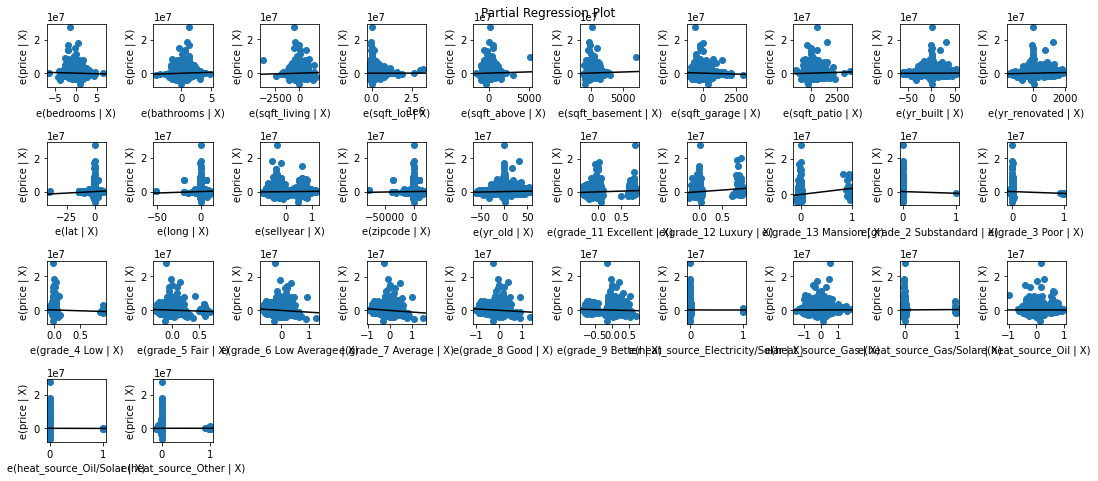

In [514]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    dummy1_results,
    exog_idx=list(x1.columns.values),
    grid=(5,10),
    fig=fig)
plt.show()

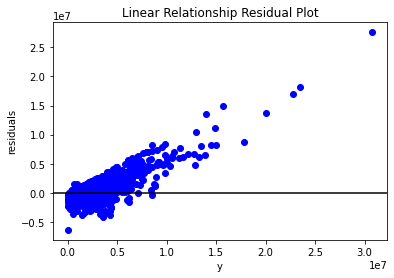

In [515]:
fig, ax = plt.subplots()

ax.scatter(y1, dummy1_results.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [516]:
from sklearn.metrics import mean_absolute_error

y_pred = dummy1_results.predict(sm.add_constant(x1))
mean_absolute_error(y, y_pred)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


333122.1586382879

# Interpretation of Model Iteration 
By including the categorical variables in our model, we were able to increase our accuracy from around 42% to about 53%. We were also able to increase precision by lowering the std errors of our numerical features. 

Variables : greenbelt, view_GOOD, condition_Poor, grade_2substandard, heat and sewersystem are all insignificant. Furthermore, this iterated model reduced the mean absolute error of the model but it is still pretty large. The partial regression plot still looks clustered, some categorical variables are seperated. Some form of feature engineering will be needed to randomize those variables, however, the seperation is largely due to the fact that they are binary.

The residual plot improved slightly but it is still indicating that something is wrong with the model. 

Interpretations 

The coefficient on bedrooms declined by almost half of the baseline model. This indicated that the error in this coefficient is partially due to omitted variables. The sign is still negative, however and something we will improve on through the next model.  

## Controlling for Outliers

The residual and box plots shows the outliers in the data, this could skew our data. 

In [517]:
#Check summary statistics for columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,sellyear,zipcode,yr_old
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872,2021.360333,96718.496031,43.539172
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073,0.480105,9125.895473,31.300361
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,2021.000000,1541.000000,-1.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075,2021.000000,98030.000000,17.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790,2021.000000,98059.000000,41.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394,2022.000000,98117.000000,65.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,2022.000000,99705.000000,122.000000


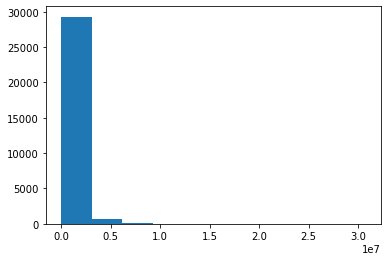

In [518]:
#Check histogram of DV 
plt.hist(df['price']);

In [519]:
#Create a DV that limits outliers 
dummy_df['log price'] = np.log(dummy_df['price'])

(array([3.6000e+01, 6.9000e+01, 2.5500e+02, 1.6150e+03, 1.4616e+04,
        1.0211e+04, 2.8540e+03, 3.8200e+02, 6.7000e+01, 6.0000e+00]),
 array([10.21683737, 10.91929369, 11.62175001, 12.32420633, 13.02666264,
        13.72911896, 14.43157528, 15.1340316 , 15.83648792, 16.53894423,
        17.24140055]),
 <BarContainer object of 10 artists>)

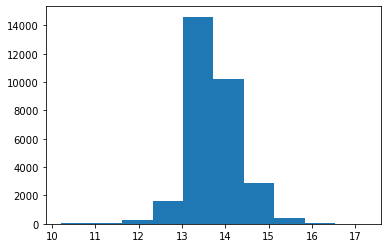

In [520]:
#Although still skewed it will limit outliers for DV 
plt.hist(dummy_df['log price'])

In [521]:
dummy_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,log price
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,...,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,...,0.388330,0.312178,0.126333,0.001959,0.683338,0.003089,0.096277,0.000133,0.000664,13.735520
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,...,0.487378,0.463390,0.332229,0.044223,0.465182,0.055490,0.294976,0.011525,0.025764,0.582031
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.216837
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.383551
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.664688
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.077875
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.241401


In [522]:
#df_cl2 = df_cl1[df_cl1['age of house'] >= 0]
#df_cl2.describe()

In [523]:
dummy_df['log price'] = np.log(dummy_df['price'])

In [524]:
dummy_df['log sqft_lot'] = np.log(dummy_df['sqft_lot'])

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_garage'}>, <AxesSubplot:>]],
      dtype=object)

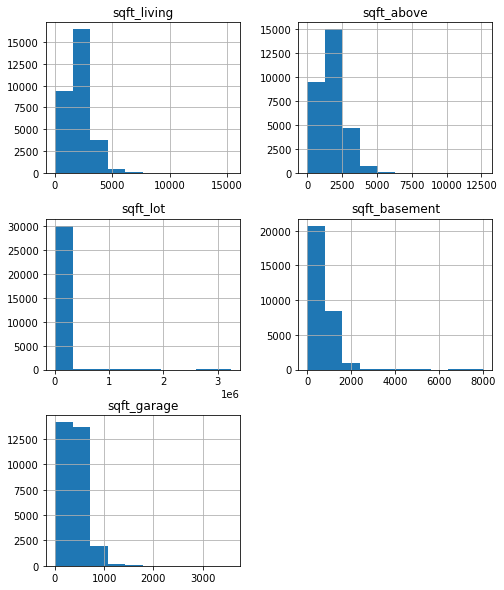

In [525]:
dummy_df[['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_basement', 'sqft_garage']]\
    .hist(figsize=(8, 10))

In [526]:
dummy_df.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long',
       'sellyear', 'zipcode', 'yr_old', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'log price', 'log sqft_lot'],
      dtype='object')

In [527]:
target_cl1 = dummy_df['log price']
pred_cl2 = dummy_df.drop(labels=['selldate',  'log sqft_lot', 'price', 'zipcode', 'address', 'log price', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'lat', 'long', 'sellyear', 'condition', 'sewer_system'], axis=1)

In [528]:
x_cl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 7399300360 to 9557800100
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bedrooms                       30111 non-null  int64  
 1   bathrooms                      30111 non-null  float64
 2   sqft_living                    30111 non-null  int64  
 3   sqft_lot                       30111 non-null  int64  
 4   sqft_above                     30111 non-null  int64  
 5   sqft_basement                  30111 non-null  int64  
 6   sqft_garage                    30111 non-null  int64  
 7   sqft_patio                     30111 non-null  int64  
 8   yr_built                       30111 non-null  int64  
 9   yr_renovated                   30111 non-null  int64  
 10  yr_old                         30111 non-null  int64  
 11  grade_11 Excellent             30111 non-null  uint8  
 12  grade_12 Luxury                3

In [529]:
y_cl1= target_cl1
x_cl1= pred_cl2

model_cl2 = sm.OLS(y_cl1, sm.add_constant(x_cl1))
results_cl1 = model_cl2.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [530]:
#Limiting variables reduces the overall fit of our model, however precision increased
results_cl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:00:52   Log-Likelihood:                -16245.
No. Observations:               30111   AIC:                         3.255e+04
Df Residuals:                   30082   BIC:                         3.279e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            13.9531      0.948     14.717      0.000      12.095      15.811
bedrooms                         -0.0287      0.003     -8.298      0.000      -0.035      -0.022
bathrooms                         0.0833      0.005     17.031      0.000       0.074       0.093
sqft_living                       0.0001   1.11e-05      9.728      0.000    8.61e-05       0.000
sqft_lot                       1.564e-07   4.13e-08      3.787      0.000    7.55e-08    2.37e-07
sqft_above                     8.035e-05    1.1e-05      7.284      0.000    5.87e-05       0.000
sqft_basement                  6.741e-05   8.44e-06      7.987      0.000    5.09e-05     8.4e-05
sqft_garage                      -0.0001   1.11e-05    -10.683      0.000      -0.000   -9.65e-05
sqft_patio                     8.756e-05    1.1e-05      7.972      0.000     6.6e-05       0.000
yr_built                         -0.0002      0.000     -0.379      0.705      -0.001       0.001
yr_renovated                      0.0001   1.48e-05      7.972      0.000    8.92e-05       0.000
yr_old                            0.0037      0.000      7.870      0.000       0.003       0.005
grade_11 Excellent                0.1798      0.024      7.556      0.000       0.133       0.226
grade_12 Luxury                   0.2115      0.040      5.253      0.000       0.133       0.290
grade_13 Mansion                 -0.0940      0.088     -1.071      0.284      -0.266       0.078
grade_2 Substandard              -1.0807      0.416     -2.600      0.009      -1.895      -0.266
grade_3 Poor                     -1.2603      0.140     -9.008      0.000      -1.535      -0.986
grade_4 Low                      -0.9955      0.064    -15.636      0.000      -1.120      -0.871
grade_5 Fair                     -1.0078      0.027    -37.298      0.000      -1.061      -0.955
grade_6 Low Average              -0.9222      0.018    -52.283      0.000      -0.957      -0.888
grade_7 Average                  -0.7035      0.015    -47.674      0.000      -0.732      -0.675
grade_8 Good                     -0.4668      0.014    -34.335      0.000      -0.493      -0.440
grade_9 Better                   -0.1989      0.014    -14.627      0.000      -0.226      -0.172
heat_source_Electricity/Solar    -0.1314      0.054     -2.419      0.016      -0.238      -0.025
heat_source_Gas                   0.0275      0.006      4.333      0.000       0.015       0.040
heat_source_Gas/Solar             0.1455      0.043      3.344      0.001       0.060       0.231
heat_source_Oil                   0.0062      0.010      0.622      0.534      -0.013       0.026
heat_source_Oil/Solar             0.0769      0.208      0.370      0.711      -0.330       0.484
heat_source_Other                 0.0883     

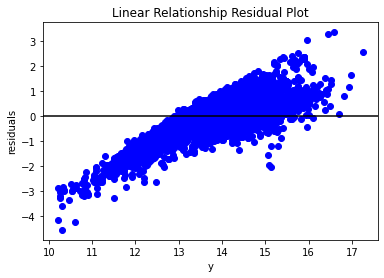

In [531]:
fig, ax = plt.subplots()

ax.scatter(y_cl1, results_cl1.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [532]:
#Results 
results_df2 = pd.concat([results_cl1.params, results_cl1.pvalues], axis=1)
results_df2.columns = ["coefficient", "pvalues"]
results_df2

,coefficient,pvalues
const,1.395308e+01,7.454251e-49
bedrooms,-2.871384e-02,1.100066e-16
bathrooms,8.330162e-02,9.782022e-65
sqft_living,1.078711e-04,2.469435e-22
sqft_lot,1.564476e-07,1.528679e-04
sqft_above,8.034925e-05,3.322476e-13
sqft_basement,6.740961e-05,1.435342e-15
sqft_garage,-1.181397e-04,1.357963e-26
sqft_patio,8.755581e-05,1.622316e-15
yr_built,-1.778158e-04,7.046659e-01


# Interpretation of a Log Transformed Model 


In order to control for the outliers in our dependent variable, I chose to take the log transformed version for analysis. Furthermore, based on the partial regression plot of our previous two models, there appears to be some type of nonlinear relation in our model. 

Although my Rsquared decreased by 1%, the precision of the model increased significantly. Therefore I will use this version of the model.

Interpretation 

This model is now going to be interpreted differently.Transforming the target variable turned all coefficints into percentage points. The majority of the numeric features have very small coefficients. 
When all IV(s) are at 0, a house is expected to increase by roughly 13%

For a one unit increase in bedrooms, this model says the a house will decrease by approximately .02%, on average. This interpretation is a classic example of the effects of omitting significant variables. Some researchers believe that bedrooms have a diminishing return

For a one unit increase in bathrooms, this model says the a house will increase by approximately .08%, on average.

For a one unit increase in square feet of the living area, this model says the a house will increase by .001%, on average.

For a one unit increase in the square footage of the lot of the home, this model says the a house will decline by $.08, on average.The errors are very obvious here as we know through theory that square footage of the lot should increase the value of the home. 

For a one unit increase in sqare feet above, this model says the a house will increase by .0008%, on average.

For a one unit increase in square feet of the basement, this model says the a house will increase by .006%, on average.

For a one unit increase in square feet of the garage, this model says the a house will decrease by .004%, on average.

The rest of the coefficients follow the same pattern. 


## City Variables

In [533]:
#Importing city variables to see what happend to our ,ode;l 
from bs4 import BeautifulSoup
import requests

In [534]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [535]:
soup = BeautifulSoup(resp.content)

In [536]:
 a_tags = soup.find('div', class_='bodycontainer').find_all('a')
city_names = [a.text for a in a_tags[-57:-25]]
len(city_names)
dummy_df['city'] = dummy_df['address'].apply(lambda x: x.split(', ')[1])

In [537]:
df_city = dummy_df.loc[dummy_df['city'].isin(city_names)]
df_city

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,log price,log sqft_lot,city
id,,,,,,,,,,,,,,,,,,,,,
7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,1,0,0,0,0,13.422468,8.873468,Renton
8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,0,0,0,1,0,0,13.732129,8.810310,Seattle
1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1,0,0,0,0,12.647548,8.725182,Seattle
1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1,0,1,0,0,0,0,13.560618,7.244228,Seattle
8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,0,0,0,0,0,0,0,13.292106,6.630683,Issaquah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376300851,2021-10-07,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,0,0,1,0,0,0,0,13.485617,7.039660,Seattle
7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,0,0,0,1,0,0,14.256986,8.294050,Seattle
194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,0,1,0,0,0,0,14.087825,8.665613,Seattle


# Model with City Variables

In [538]:
cat_columns2 = ['city']
df_city = pd.get_dummies(data=df_city, columns=cat_columns2, drop_first=True)

In [539]:
x_final = df_city.drop(labels=['selldate', 'price', 'zipcode', 'address', 'log price', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'lat', 'long', 'sellyear', 'condition', 'sewer_system'], axis=1)
y_final= df_city['log price'] 


model4 = sm.OLS(y_final, sm.add_constant(x_final))
results4 = model4.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [540]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     825.0
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:00:53   Log-Likelihood:                -8941.0
No. Observations:               25757   AIC:                         1.800e+04
Df Residuals:                   25698   BIC:                         1.848e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            13.1554      0.830     15.859      0.000      11.529      14.781
bedrooms                         -0.0114      0.003     -3.690      0.000      -0.017      -0.005
bathrooms                         0.0580      0.004     13.134      0.000       0.049       0.067
sqft_living                       0.0001      1e-05     10.730      0.000    8.79e-05       0.000
sqft_lot                       2.142e-07   4.25e-08      5.042      0.000    1.31e-07    2.97e-07
sqft_above                     8.804e-05   9.89e-06      8.906      0.000    6.87e-05       0.000
sqft_basement                  3.297e-05   7.72e-06      4.269      0.000    1.78e-05    4.81e-05
sqft_garage                   -3.461e-05   1.11e-05     -3.129      0.002   -5.63e-05   -1.29e-05
sqft_patio                     6.124e-05   9.89e-06      6.194      0.000    4.19e-05    8.06e-05
yr_built                         -0.0002      0.000     -0.603      0.546      -0.001       0.001
yr_renovated                   7.393e-05   1.32e-05      5.601      0.000    4.81e-05    9.98e-05
yr_old                            0.0018      0.000      4.246      0.000       0.001       0.003
grade_11 Excellent                0.1066      0.021      5.129      0.000       0.066       0.147
grade_12 Luxury                   0.0681      0.035      1.937      0.053      -0.001       0.137
grade_13 Mansion                 -0.1015      0.079     -1.284      0.199      -0.256       0.053
grade_2 Substandard              -0.8627      0.344     -2.507      0.012      -1.537      -0.188
grade_3 Poor                     -0.7720      0.116     -6.660      0.000      -0.999      -0.545
grade_4 Low                      -0.5401      0.058     -9.390      0.000      -0.653      -0.427
grade_5 Fair                     -0.5587      0.025    -22.356      0.000      -0.608      -0.510
grade_6 Low Average              -0.5295      0.016    -32.275      0.000      -0.562      -0.497
grade_7 Average                  -0.3792      0.014    -28.026      0.000      -0.406      -0.353
grade_8 Good                     -0.2248      0.012    -18.416      0.000      -0.249      -0.201
grade_9 Better                   -0.0636      0.012     -5.332      0.000      -0.087      -0.040
heat_source_Electricity/Solar    -0.1585      0.048     -3.310      0.001      -0.252      -0.065
heat_source_Gas                   0.0348      0.006      5.941      0.000       0.023       0.046
heat_source_Gas/Solar             0.1176      0.039      3.052      0.002       0.042       0.193
heat_source_Oil                  -0.0069      0.009     -0.748      0.454      -0.025       0.011
heat_source_Oil/Solar             0.0326      0.243      0.134      0.893      -0.443       0.508
heat_source_Other                 0.1014     

# Interpretation of Model with City Variables
Overall this model is statistically significant. Rsquared has also increased tremendously from 50 to 60 percent. This is due to the amount of variables now included in the model due to encoding te 'city variable. The precision of our model also increased, tightening the confidence intervals. However we must approach these results with caution as important variables such as crime, schools and race were not able to be included in the data which could possibly cause omitted variable bias. 


When all IV(s) are at 0, a house is expected to increase by roughly 13%

For a one unit increase in bedrooms, this model says the a house will decrease by approximately .01%, on average. This interpretation is a classic example of the effects of omitting significant variables. Some researchers believe that bedrooms have a diminishing return. As we see, the more confounding variables we include in the model, the more bedroom coefficient moves toward the appropriate sign.

For a one unit increase in bathrooms, this model says the a house will increase by approximately .08%, on average.

For a one unit increase in square feet of the living area, this model says the a house will increase by .001%, on average.

For a one unit increase in the square footage of the lot of the home, this model says the a house will decline by $.08, on average.The errors are very obvious here as we know through theory that square footage of the lot should increase the value of the home. 

For a one unit increase in sqare feet above, this model says the a house will increase by .0008%, on average.

For a one unit increase in square feet of the basement, this model says the a house will increase by .006%, on average.

For a one unit increase in square feet of the garage, this model says the a house will decrease by .004%, on average.

For category variables, the interpretation is slightly different. 

For a grade of EXCELLENT, our model states that houses will increase at a rate of 10% relative to the grade of very poor. Each factor is based on the reference category. I chose to use this caegory because it serves as a base line. 

One important estimate is that of city_Mercer Island which states that there city has a homes that are around 90% more expensive than the baseline city. 

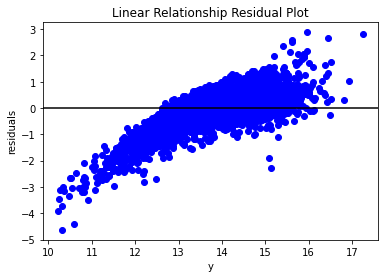

In [541]:
fig, ax = plt.subplots()

ax.scatter(y_final, results4.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [542]:
results_df3 = pd.concat([results4.params, results4.pvalues], axis=1)
results_df3.columns = ["coefficient", "pvalues"]
results_df3

,coefficient,pvalues
const,1.315541e+01,2.269641e-56
bedrooms,-1.141361e-02,2.244327e-04
bathrooms,5.800373e-02,2.803296e-39
sqft_living,1.074994e-04,8.376325e-27
sqft_lot,2.141555e-07,4.642918e-07
sqft_above,8.803784e-05,5.627780e-19
sqft_basement,3.297048e-05,1.972014e-05
sqft_garage,-3.461251e-05,1.758655e-03
sqft_patio,6.123844e-05,5.941165e-10
yr_built,-2.472486e-04,5.462478e-01


# Check Mulitcollinearity

In [543]:
# Create variable for multicollinearity analysis
df12 = x_final.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df12['pairs'] = list(zip(df12.level_0, df12.level_1))

df12.set_index(['pairs'], inplace = True)

df12.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df12.columns = ['cc']

df12.drop_duplicates(inplace=True)

df12[(df12.cc>.75) & (df12.cc<1)]

,cc
pairs,
"(yr_built, yr_old)",0.909320
"(sqft_above, sqft_living)",0.883537
"(bathrooms, sqft_living)",0.773238


# Tesing Assumptions

## Interpretation of Multicollinearity 
According to this chart, we have 6 pairs of variables that are linearly correlated. In order to correct for this I will chose to remove bathrooms, long, lat and sqft_above

### Removing insignificant values and those that are multicolinear

In [ ]:
x_final1 = df_city.drop(labels=['selldate', 'price', 'zipcode', 'address', 'log price', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'lat', 'long', 'sellyear', 'condition', 'sewer_system', 'bathrooms', 'sqft_above', 'city_Pacific', 'city_Federal Way', 'city_Baring', 'heat_source_Oil', 'heat_source_Oil/Solar','grade_13 Mansion', 'sqft_garage', 'bedrooms', 'yr_built' ], axis=1)
y_final1= df_city['log price'] 


model5 = sm.OLS(y_final1, sm.add_constant(x_final1))
results5 = model5.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results5.summary()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_final1, results5.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.autoscale
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### Analysis of Residual Plot 
Although there is still an indication of bias in the model, it looks slightly more encompassed than the previous model. After removing two variables that suffered from multicolinearity, our Rsquared decline. This represents the classic tradeoff between being bias and being accurate. 

# Test for Linearity

In [ ]:
n = results5.nobs

# Taking the middle 50%, so ignoring the first 25% and last 25%
lower_bound = int(np.ceil(n * 0.25))
upper_bound = int(np.floor(n * 0.75))

# Take subsets of y and X
subset_y = model5.endog[lower_bound:upper_bound]
subset_X = model5.exog[lower_bound:upper_bound]

In [ ]:
subset_model = sm.OLS(subset_y, subset_X)
subset_results = subset_model.fit()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

axes[0].scatter(model5.endog, results5.resid, color="green")
axes[0].set_title("Full Data Residual Plot")

axes[1].scatter(subset_y, subset_results.resid, color="green")
axes[1].set_title("Subset Residual Plot")

for ax in axes:
    ax.set_xlabel("y")
    ax.set_ylabel("residuals")
    ax.axhline(y=0, color="black")

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow
print(linear_rainbow(results5))
print(linear_rainbow(subset_results))

# Rainbow Test Results Analysis 
For this particular test, the null hypothesis is that the subset data and full data are linear. The first model (House data) has a p-value of about 0.36. This is much higher than the standard alpha of 0.05, so we fail to reject the null hypothesis and can consider the relationship to be linear

The second model (House data) has a p-value of about 0.034. This is slightly lower than the standard alpha of 0.05, so we fail to reject the null hypothesis and can consider the relationship to be linear

I will create an interaction term in hopes to satisfy this assumption


# Creating an Interaction Term 

In [ ]:
#Assessing Potential Variables
import matplotlib.pyplot as plt

# Filter to houses in specific neighborhoods
MercerIsland = dummy_df[dummy_df['city'] == 'Mercer Island']
Medina = dummy_df[dummy_df['city'] == 'Medina']

fig, ax = plt.subplots(figsize=(10,5))

# Create scatter plots with 2 different colors
MercerIsland.plot.scatter(x="sqft_living", y="price", alpha=0.7, label="Mercer", ax=ax)
Medina.plot.scatter(x='sqft_living', y="price", alpha=0.7, color="orange", label="Medina", ax=ax)

# Plot best fit line
intercept = results5.params["const"]
slope = results5.params["sqft_living"]
ax.plot(df_city["sqft_living"], intercept + df_city["sqft_living"] * slope, color="gray", label="fit line (Blmngtn)")

ax.legend();

# Analysis of Scatterplot 
Both variables have slopes that differ significantly from the fir line which suggest the possibility of successfully inputting an interaction term. 

In [ ]:
df_city["Sqft_living x city_Medina"] = df_city["sqft_living"] * \
                        df_city["city_Medina"]

In [ ]:
x_inter = df_city.drop(labels=['selldate', 'price', 'zipcode', 'address', 'log price', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'lat', 'long', 'sellyear', 'condition', 'sewer_system', 'bathrooms', 'sqft_above', 'city_Pacific', 'city_Federal Way', 'city_Baring', 'heat_source_Oil', 'heat_source_Oil/Solar','grade_13 Mansion', 'sqft_garage', 'bedrooms', 'yr_built' ], axis=1) 

In [ ]:
interaction_model = sm.OLS(y_final1, sm.add_constant(x_inter))
interaction_results = interaction_model.fit()

In [ ]:
interaction_results.summary()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_final1, interaction_results.resid, color="blue")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.autoscale
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [ ]:
results_df3 = pd.concat([interaction_results.params, interaction_results.pvalues], axis=1)
results_df3.columns = ["coefficient", "pvalues"]
results_df3

# Analysis of Interaction Term Model 
So what is important here is that our interactin term is statisticlly significant. It represents the change in home sales basded on both square footage of the home AND the location. What this term means is that home sale price will differ by city for the same square footage. 

# Conclusions
Overall, our goal was to determine important factors that contribute to the fluctuation in home sales for King County, Washington. Based on the fact that all metrics improved with each new model further solidifies our findings. The three key variables that would help stakeholders attract more homeowners are : Citie characteristics, the overall aesthetic of the house and the size of the house. We also discovered the significance of looking at the interaction term for square feet of the living space and the neighborhood that the huse is in. 

One important limitation of this model is the fact that it did not include important factors like crime and mortgage rates. Near the end of 2022, the government increased the interest rates for the first time in 10 years, which, through the trickle down effect, increased all rates, include mortgage rates. This data would be perfect for that analysis because it encompasses both eras. 

For this final model, bathrooms and bedrooms rendered to be insignificant. This could be due to the increase in influential variables with each model. 

Final Model Interpretation 

When all IV(s) are at 0, a house is expected to increase by roughly 12%, this coefficient has not changed much from previous models.

For a one unit increase in square feet of the living area, this model says the a house will increase by .002%, on average.By itself, this variable has very little effect but as we will see, the interaction term may have a larger effect. 

For a one unit increase in the square footage of the lot of the home, this model says the a house will decline by $.08, on average.The errors are very obvious here as we know through theory that square footage of the lot should increase the value of the home. 

For a one unit increase in sqare feet above, this model says the a house will increase by .0008%, on average.

For a one unit increase in square feet of the basement, this model says the a house will increase by .006%, on average.

For a one unit increase in square feet of the garage, this model says the a house will decrease by .004%, on average.

For category variables, the interpretation is slightly different. 

For a grade of EXCELLENT, our model states that houses will increase at a rate of 10% relative to the grade of very poor. Each factor is based on the reference category. I chose to use this caegory because it serves as a base line. 

One important estimate is that of city_Mercer Island which states that there city has a homes that are around 90% more expensive than the baseline city. 

Our interaction term states that for every one unit increase in the city of Merced, home sales will decline at a rate of .0006 lower than the reference city.